In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import os 

folder_path = r"C:\Users\nq9093\Downloads\CutFilesToYaolin\CutFilesToYaolin"
files = os.listdir(folder_path)

In [2]:
filenames = []
for file in files: 
    if file.endswith(".cut"): 
        filenames.append(file[:-4])

In [6]:
file = filenames[0]
filepath = os.path.join(folder_path, file)

def read_file(filepath): 
    df_accelerometer = pd.read_csv(filepath + "_box1.csv", header=None, sep=";", names=['timestamp', 'x2g', 'y2g', 'z2g', 'x50g', 'y50g'])
    df_strain = pd.read_csv(filepath + "_box2.csv", header=None, sep=";")
    return df_accelerometer, df_strain

df_accelerometer, df_strain = read_file(filepath)

,timestamp,x2g,y2g,z2g,x50g,y50g
0,1024170.000,1924,1435,2050,1685,1659
1,1024170.625,2129,1573,2089,1681,1650
2,1024171.250,2081,1544,2117,1675,1644
3,1024171.875,1911,1427,2051,1691,1649
4,1024172.500,2092,1525,2076,1683,1649


In [28]:
def reconstruct_strain(df_strain): 
    strain0 = []
    strain1 = []
    ind_0 = np.where(df_strain.iloc[:, 1] == 0)[0]
    ind_1 = np.where(df_strain.iloc[:, 1] == 1)[0]
    data_0 = df_strain.iloc[ind_0, :]
    data_1 = df_strain.iloc[ind_1, :]
    N_cols = data_0.shape[1] - 2
    dt_0 = np.diff(data_0.iloc[:, 0]) / N_cols
    dt_1 = np.diff(data_1.iloc[:, 0]) / N_cols
    dt_0 = np.append(dt_0, dt_0[-1])
    dt_1 = np.append(dt_1, dt_1[-1])
    for i in range(len(data_0)): 
        for j in range(data_0.shape[1] - 2): 
            strain0.append([data_0.iloc[i, 0] + j*dt_0[i], data_0.iloc[i, j+2]])
    for i in range(len(data_1)):
        for j in range(data_1.shape[1] - 2): 
            strain1.append([data_1.iloc[i, 0] + j*dt_1[i], data_1.iloc[i, j+2]])
    strain0 = pd.DataFrame(strain0, columns=['timestamp', 'value'])
    strain1 = pd.DataFrame(strain1, columns=['timestamp', 'value'])
    strain0['timestamp'] = strain0['timestamp'] - strain0['timestamp'].iloc[0]
    strain1['timestamp'] = strain1['timestamp'] - strain1['timestamp'].iloc[0]
    strain0['timestamp'] = strain0['timestamp'] / 1000
    strain1['timestamp'] = strain1['timestamp'] / 1000
    return strain0, strain1

strain0, strain1 = reconstruct_strain(df_strain)

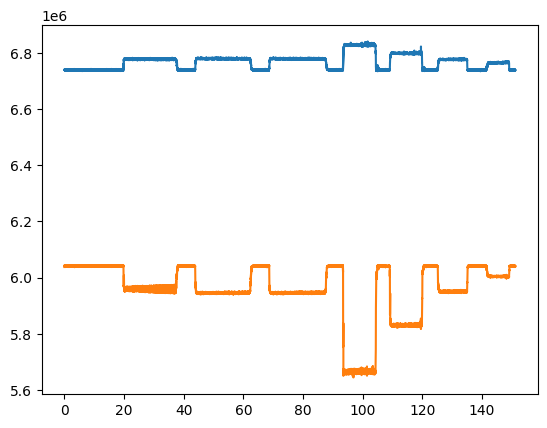

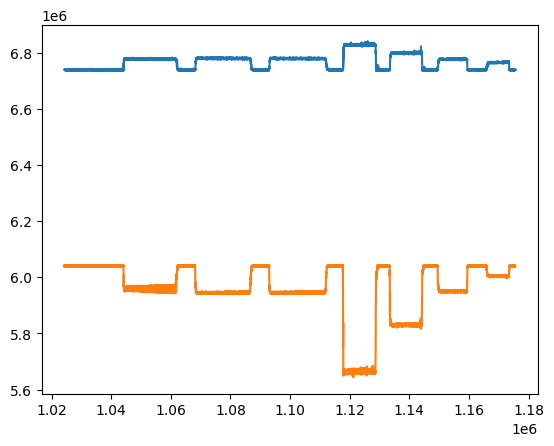

In [24]:
plt.plot(strain0[:, 0], strain0[:, 1])
plt.plot(strain1[:, 0], strain1[:, 1])
plt.show()
